<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

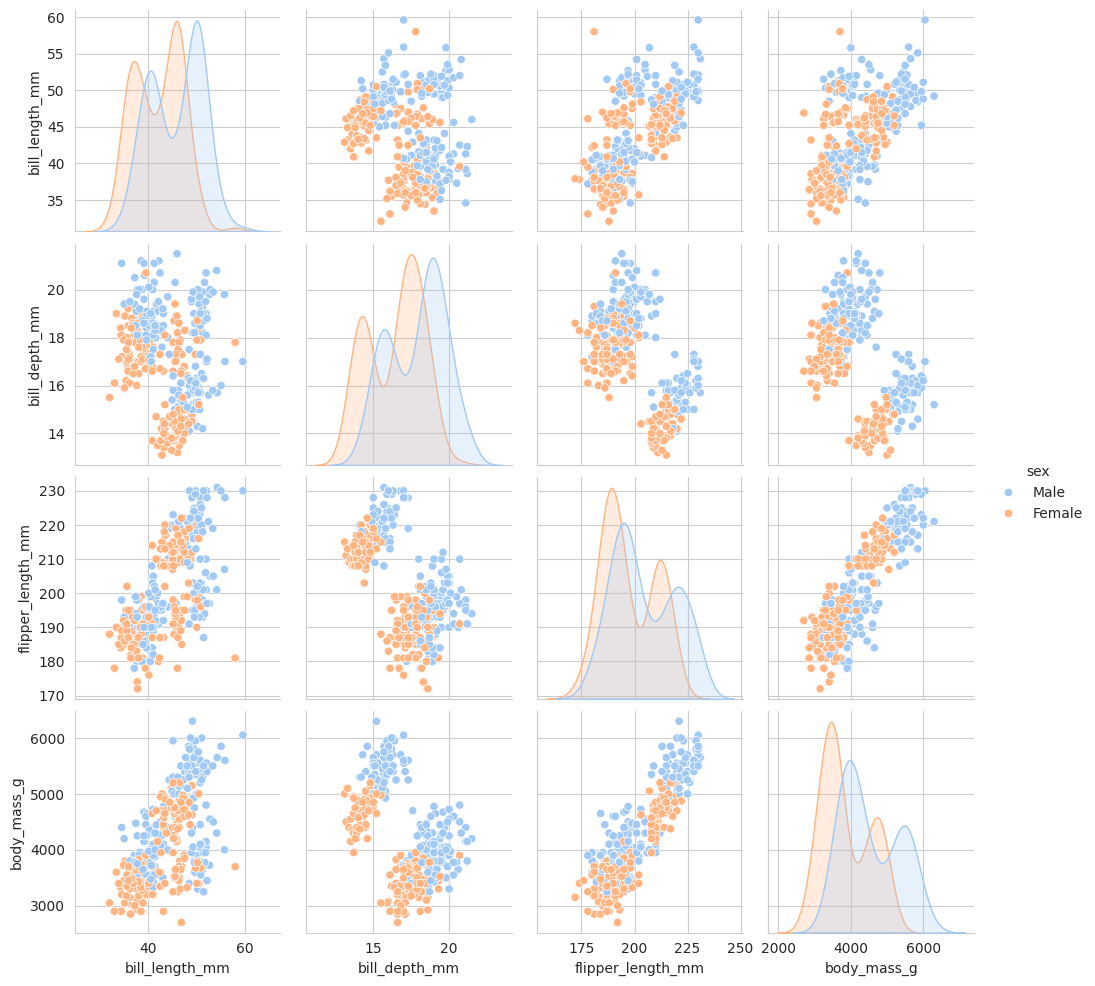

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

 - Atributos por espécie:

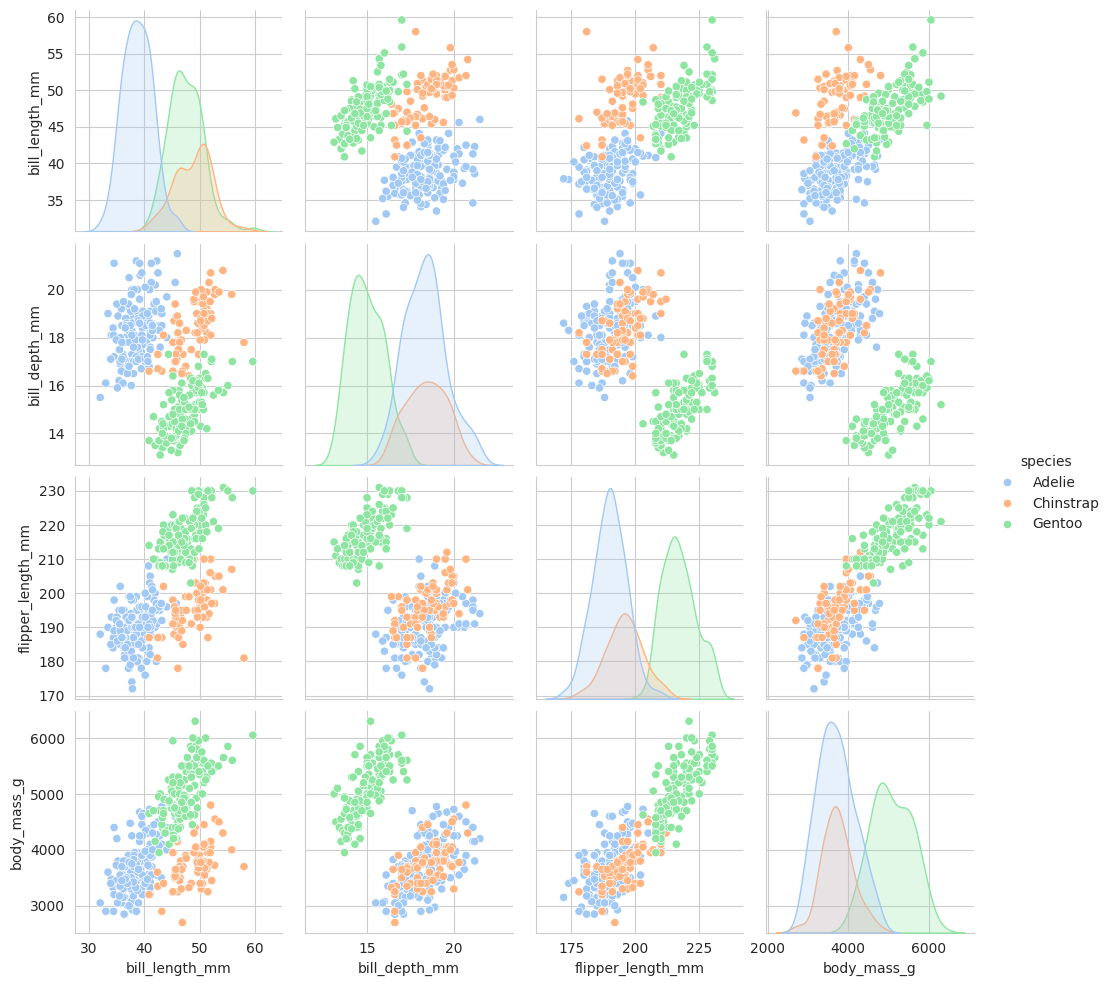

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

 - Atributos por ilha:

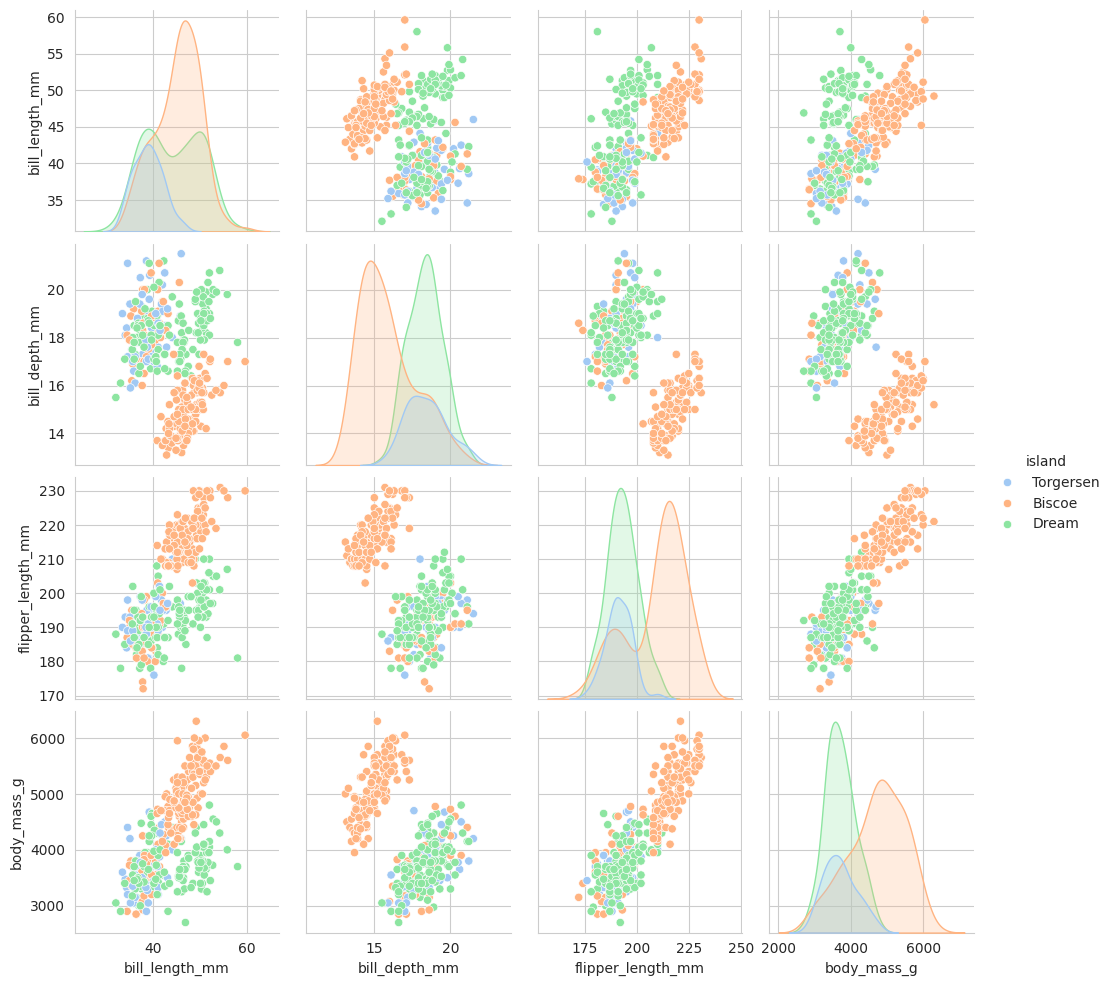

In [7]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

### **Graficos importantes para o modelo :**


Text(0.5, 1.0, 'Comprimento da Asa vs. Peso do Corpo')

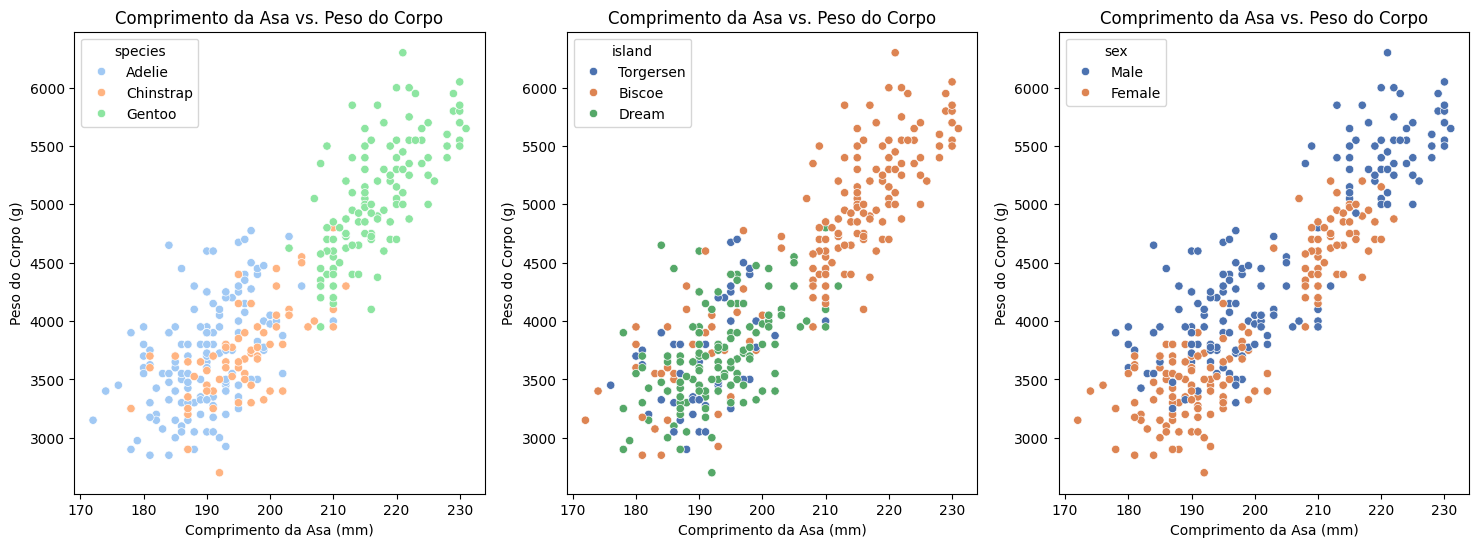

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(ax=axes[0], data=penguim, x="flipper_length_mm", y="body_mass_g", hue="species", palette="pastel")
axes[0].set_xlabel("Comprimento da Asa (mm)")
axes[0].set_ylabel("Peso do Corpo (g)")
axes[0].set_title("Comprimento da Asa vs. Peso do Corpo")

sns.scatterplot(ax=axes[1], data=penguim, x="flipper_length_mm", y="body_mass_g", hue="island", palette="deep")
axes[1].set_xlabel("Comprimento da Asa (mm)")
axes[1].set_ylabel("Peso do Corpo (g)")
axes[1].set_title("Comprimento da Asa vs. Peso do Corpo")

sns.scatterplot(ax=axes[2], data=penguim, x="flipper_length_mm", y="body_mass_g", hue="sex", palette="deep")
axes[2].set_xlabel("Comprimento da Asa (mm)")
axes[2].set_ylabel("Peso do Corpo (g)")
axes[2].set_title("Comprimento da Asa vs. Peso do Corpo")

insights 1: nos tres graficos acima podemos observar que quanto maior o comprimento da asa maior será o peso. podemos ver tambem que quem tem os pinguins com maiores comprimentos são aqueles que são da ilha biscue e tambem aqueles que são da espécie Gentoo,que tambem parecem estar em mais quantidade, os das outras espécies e ilhas estão um pouco misturados, porem se observar com calma voce vera  que há mais pinguins da especie adelie do que da espécie chinstrap , e que há mais pinguins da ilha dream do que na torgesen. pinguins maiores que 210 mm e mais pesados que 5000g são  da espécie gentoo e da ilha biscoe ( aqueles mais pesados que 5000g  são apenas machos)

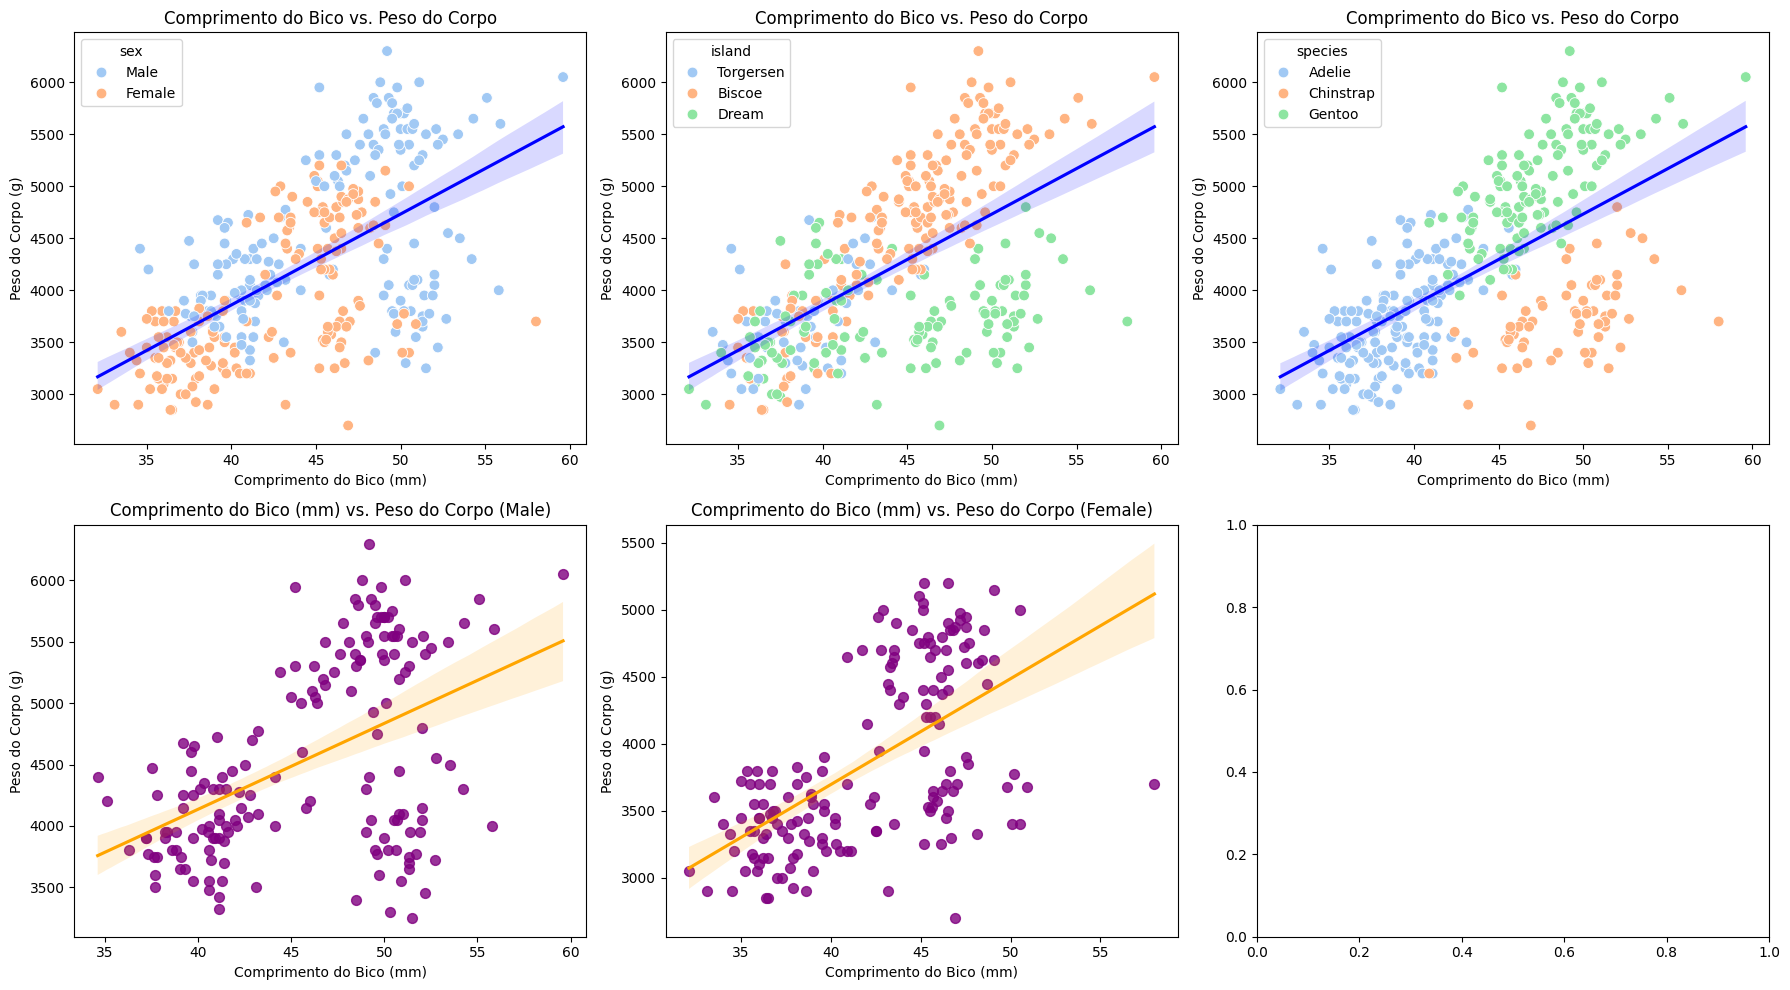

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando a figura com dois subplots em uma linha
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 1 linha, 2 colunas

# Gráfico 1 - Peso por Espécie (Pontos Individuais) - Usando sns.regplot no lugar de sns.lmplot
sns.scatterplot(ax=axes[0,0], data=penguim, x="bill_length_mm", y="body_mass_g", hue="sex", palette="pastel", s=60)

# Adicionando a linha de regressão com regplot
sns.regplot(ax=axes[0,0], data=penguim, x="bill_length_mm", y="body_mass_g", scatter=False, line_kws={"color": "blue", "linestyle": "-"})

# Títulos e rótulos para o gráfico
axes[0,0].set_title("Comprimento do Bico vs. Peso do Corpo")
axes[0,0].set_xlabel("Comprimento do Bico (mm)")
axes[0,0].set_ylabel("Peso do Corpo (g)")

#grafico 2
sns.scatterplot(ax=axes[0,1], data=penguim, x="bill_length_mm", y="body_mass_g", hue="island", palette="pastel", s=60)

# Adicionando a linha de regressão com regplot
sns.regplot(ax=axes[0, 1], data=penguim, x="bill_length_mm", y="body_mass_g", scatter=False, line_kws={"color": "blue", "linestyle": "-"})

# Títulos e rótulos para o gráfico
axes[0, 1].set_title("Comprimento do Bico vs. Peso do Corpo")
axes[0, 1].set_xlabel("Comprimento do Bico (mm)")
axes[0, 1].set_ylabel("Peso do Corpo (g)")
#grafico 3
sns.scatterplot(ax=axes[0,2], data=penguim, x="bill_length_mm", y="body_mass_g", hue="species", palette="pastel", s=60)

# Adicionando a linha de regressão com regplot
sns.regplot(ax=axes[0, 2], data=penguim, x="bill_length_mm", y="body_mass_g", scatter=False, line_kws={"color": "blue", "linestyle": "-"})

# Títulos e rótulos para o gráfico
axes[0, 2].set_title("Comprimento do Bico vs. Peso do Corpo")
axes[0, 2].set_xlabel("Comprimento do Bico (mm)")
axes[0, 2].set_ylabel("Peso do Corpo (g)")

# Gráfico 4 - para male
sns.regplot(
    ax=axes[1,0],
    x="bill_length_mm",
    y="body_mass_g",
    data=penguim[penguim['sex'] == 'Male'],
    scatter_kws={'color': 'purple', 's': 50},
    line_kws={'color': 'orange'}
)
axes[1, 0].set_title("Comprimento do Bico (mm) vs. Peso do Corpo (Male)")
axes[1, 0].set_xlabel("Comprimento do Bico (mm)")
axes[1, 0].set_ylabel("Peso do Corpo (g)")

# Gráfico 5 - Para 'Female'
sns.regplot(
    ax=axes[1, 1],
    x="bill_length_mm",
    y="body_mass_g",
    data=penguim[penguim['sex'] == 'Female'],
    scatter_kws={'color': 'purple', 's': 50},
    line_kws={'color': 'orange'}
)
axes[1, 1].set_title("Comprimento do Bico (mm) vs. Peso do Corpo (Female)")
axes[1, 1].set_xlabel("Comprimento do Bico (mm)")
axes[1, 1].set_ylabel("Peso do Corpo (g)")


# Ajuste para que a legenda dos subplots não se sobreponha
plt.tight_layout()
plt.show()



insights 2: nestes graficos podemos ver que o comprimento do bico não tem tanta ligação com o peso, ja que há pinguins com bico grande que é leve e pesado , e o mesmo acontece com aqueles com bico pequeno.podemos observar tambem que os pinguins com bicos menores são os da espécie adelie

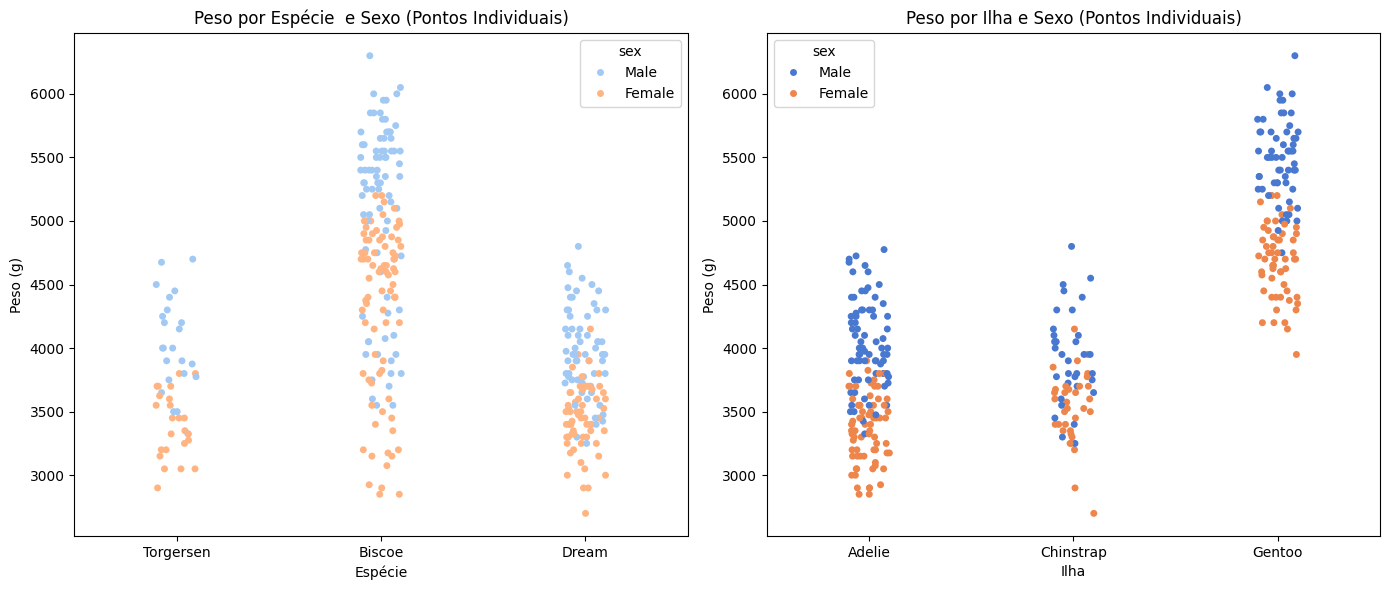

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando a figura com dois subplots em uma linha
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

# Gráfico 1 - Peso por Espécie (Pontos Individuais)
sns.stripplot(ax=axes[0], x='island', y='body_mass_g', hue='sex', data=penguim, jitter=True, palette="pastel")
axes[0].set_xlabel('Espécie')
axes[0].set_ylabel('Peso (g)')
axes[0].set_title('Peso por Espécie  e Sexo (Pontos Individuais)')

#grafico 2

sns.stripplot(ax=axes[1], x='species', y='body_mass_g', hue='sex', data=penguim, jitter=True, palette="muted")
axes[1].set_xlabel('Ilha')
axes[1].set_ylabel('Peso (g)')
axes[1].set_title('Peso por Ilha e Sexo (Pontos Individuais)')

# Ajuste para que a legenda dos subplots não se sobreponha
plt.tight_layout()
plt.show()

insights 3: nesses graficos podemos observar que independente da ilha ou espécie , os pinguins machos são mais pesados que as femeas

Text(0.5, 1.0, 'Profundidade do Bico vs. Peso do Corpo')

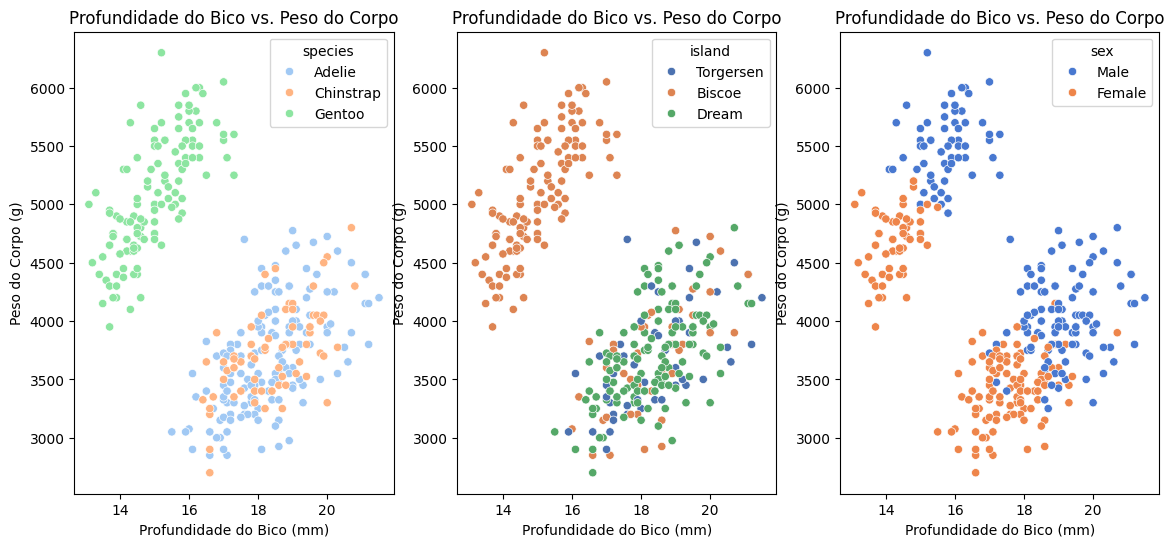

In [13]:
# Gráfico 2 - Profundidade do Bico vs. Peso do Corpo
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

sns.scatterplot(ax=axes[0], data=penguim, x="bill_depth_mm", y="body_mass_g", hue="species", palette="pastel")
axes[0].set_xlabel("Profundidade do Bico (mm)")
axes[0].set_ylabel("Peso do Corpo (g)")
axes[0].set_title("Profundidade do Bico vs. Peso do Corpo")

sns.scatterplot(ax=axes[1], data=penguim, x="bill_depth_mm", y="body_mass_g", hue="island", palette="deep")
axes[1].set_xlabel("Profundidade do Bico (mm)")
axes[1].set_ylabel("Peso do Corpo (g)")
axes[1].set_title("Profundidade do Bico vs. Peso do Corpo")

sns.scatterplot(ax=axes[2], data=penguim, x="bill_depth_mm", y="body_mass_g", hue="sex", palette="muted")
axes[2].set_xlabel("Profundidade do Bico (mm)")
axes[2].set_ylabel("Peso do Corpo (g)")
axes[2].set_title("Profundidade do Bico vs. Peso do Corpo")

insights 4: vemos que quanto menor a profundidade do bico maior sera o peso do pinguim; as menores profundidade de bicos são dos pinguins da especie gentoo e da ilha biscoe; vemos que os machos tem a profundidade maior que as femeas

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [14]:
# resposta da questão 2.1
penguim.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [15]:
penguim.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [16]:
penguim.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [17]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [18]:
penguim['bill_length_mm'] = penguim['bill_length_mm'].fillna(penguim['bill_length_mm'].mean())
penguim['bill_depth_mm'] = penguim['bill_depth_mm'].fillna(penguim['bill_depth_mm'].mean())
penguim['flipper_length_mm'] = penguim['flipper_length_mm'].fillna(penguim['flipper_length_mm'].mean())
penguim['body_mass_g'] = penguim['body_mass_g'].fillna(penguim['body_mass_g'].mean())
penguim['sex']= penguim['sex'].fillna(penguim['sex'].mode()[0])

In [19]:
penguim = penguim.round(2)
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,Male
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,Female
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,Female
3,Adelie,Torgersen,43.92,17.15,200.92,4201.75,Male
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,Female


In [20]:
data = penguim.copy()

### **2.2. Variáveis numéricas**

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [21]:
# resposta da questão 2.2

length_media = data['bill_length_mm'].mean()
length_desvio_padrao = data['bill_length_mm'].std()

depth_media = data['bill_depth_mm'].mean()
depth_desvio_padrao = data['bill_depth_mm'].std()

flipper_media = data['flipper_length_mm'].mean()
flipper_desvio_padrao = data['flipper_length_mm'].std()



In [22]:
data['bill_length_mm_std'] = data['bill_length_mm'].apply(lambda length: (length - length_media) / length_desvio_padrao)
data['bill_depth_mm_std'] = data['bill_depth_mm'].apply(lambda depth: (depth - depth_media) / depth_desvio_padrao)
data['flipper_length_mm_std'] = data['flipper_length_mm'].apply(lambda flipper: (flipper - flipper_media) / flipper_desvio_padrao)
data.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.885789,0.786600,-1.420421
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.812309,0.126376,-1.063804
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.665348,0.431095,-0.421894


### **2.3. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [23]:
# resposta da questão 2.3

data[['sex']].drop_duplicates()

,sex
0,Male
1,Female


In [24]:

data['sex_m_nom'] = data['sex'].apply(lambda x: 1 if x == 'Male' else 0)
data['sex_f_nom'] = data['sex'].apply(lambda x: 1 if x == 'Female' else 0 )

In [25]:
data[['species']].drop_duplicates()

,species
0,Adelie
152,Chinstrap
220,Gentoo


In [26]:
data['specie_adelie_nom'] = data['species'].apply(lambda x: 1 if x == 'Adelie' else 0)
data['specie_chinstrap_nom'] = data['species'].apply(lambda x: 1 if x == 'Chinstrap' else 0)
data['specie_gentoo_nom'] = data['species'].apply(lambda x: 1 if x == 'Gentoo' else 0)

In [27]:
data[['island']].drop_duplicates()

,island
0,Torgersen
20,Biscoe
30,Dream


In [28]:
data['island_nom_Torgersen'] = data['island'].apply(lambda valor: 1 if valor == 'Torgersen' else 0)
data['island_nom_Biscoe'] = data['island'].apply(lambda valor: 1 if valor == 'Biscoe' else 0)
data['island_nom_Dream'] = data['island'].apply(lambda valor: 1 if valor == 'Dream' else 0)


In [29]:
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,specie_adelie_nom,specie_chinstrap_nom,specie_gentoo_nom,island_nom_Torgersen,island_nom_Biscoe,island_nom_Dream
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,Male,-0.885789,0.786600,-1.420421,1,0,1,0,0,1,0,0
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,Female,-0.812309,0.126376,-1.063804,0,1,1,0,0,1,0,0
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,Female,-0.665348,0.431095,-0.421894,0,1,1,0,0,1,0,0
3,Adelie,Torgersen,43.92,17.15,200.92,4201.75,Male,-0.000352,-0.000591,0.000340,1,0,1,0,0,1,0,0
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,Female,-1.326670,1.091319,-0.564541,0,1,1,0,0,1,0,0
5,Adelie,Torgersen,39.30,20.60,190.00,3650.00,Male,-0.849049,1.751544,-0.778511,1,0,1,0,0,1,0,0
6,Adelie,Torgersen,38.90,17.80,181.00,3625.00,Female,-0.922529,0.329522,-1.420421,0,1,1,0,0,1,0,0
7,Adelie,Torgersen,39.20,19.60,195.00,4675.00,Male,-0.867419,1.243679,-0.421894,1,0,1,0,0,1,0,0
8,Adelie,Torgersen,34.10,18.10,193.00,3475.00,Male,-1.804291,0.481881,-0.564541,1,0,1,0,0,1,0,0
9,Adelie,Torgersen,42.00,20.20,190.00,4250.00,Male,-0.353057,1.548398,-0.778511,1,0,1,0,0,1,0,0


### **2.4. Limpeza**

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [30]:
# resposta da questão 2.4
data = data.drop(['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'sex'], axis=1)
data.head()

,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,specie_adelie_nom,specie_chinstrap_nom,specie_gentoo_nom,island_nom_Torgersen,island_nom_Biscoe,island_nom_Dream
0,3750.00,-0.885789,0.786600,-1.420421,1,0,1,0,0,1,0,0
1,3800.00,-0.812309,0.126376,-1.063804,0,1,1,0,0,1,0,0
2,3250.00,-0.665348,0.431095,-0.421894,0,1,1,0,0,1,0,0
3,4201.75,-0.000352,-0.000591,0.000340,1,0,1,0,0,1,0,0
4,3450.00,-1.326670,1.091319,-0.564541,0,1,1,0,0,1,0,0


### **2.5. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [32]:
# resposta da questão 2.5

In [31]:
X = data[['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std', 'sex_m_nom', 'sex_f_nom',	'specie_adelie_nom', 'specie_chinstrap_nom', 'specie_gentoo_nom', 'island_nom_Torgersen', 'island_nom_Biscoe', 'island_nom_Dream']]
y = data['body_mass_g']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
# resposta da questão 3.1

### **3.2. Avaliação**

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [37]:
# resposta da questão 3.2
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 88040.14455806295
R² Score: 0.8662421386265113


In [39]:
rmse = mse ** 0.5

print(f'RMSE: {rmse}')

RMSE: 296.71559540756016


## 4\. Predição  

### **4.1. Novo penguim**

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [40]:
# resposta da questão 4.1

In [41]:
data.head(1)

,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,specie_adelie_nom,specie_chinstrap_nom,specie_gentoo_nom,island_nom_Torgersen,island_nom_Biscoe,island_nom_Dream
0,3750.0,-0.885789,0.7866,-1.420421,1,0,1,0,0,1,0,0


In [48]:
bill_length_mm_std = (38.2 - length_media) / length_desvio_padrao
bill_depth_mm_std = (18.1 - depth_media) / depth_desvio_padrao
flipper_length_mm_std = (185.0 - flipper_media) / flipper_desvio_padrao
novo_penguim = np.array([[bill_length_mm_std, bill_depth_mm_std, flipper_length_mm_std, 1, 0, 1, 0, 0, 0, 1, 0]])

In [49]:
novo_penguim_df = pd.DataFrame(novo_penguim, columns=[ 'bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std', 'sex_m_nom', 'sex_f_nom', 'specie_adelie_nom', 'specie_chinstrap_nom', 'specie_gentoo_nom', 'island_nom_Torgersen', 'island_nom_Biscoe', 'island_nom_Dream'])

In [51]:
peso = model.predict(novo_penguim_df)
print(f'O peso previsto do pinguim é: {peso[0]}')

O peso previsto do pinguim é: 3722.5958504481505


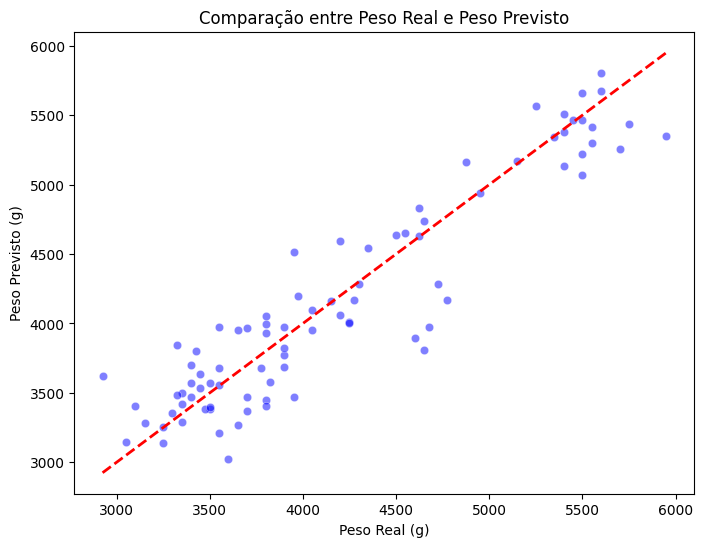

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DataFrame com os valores reais e previstos do conjunto de teste
prediction = pd.DataFrame({
    'body_mass_g_real': y_test,
    'body_mass_g_predicted': y_pred
})

# Criando o gráfico de dispersão para comparar valores reais e previstos
plt.figure(figsize=(8, 6))
sns.scatterplot(data=prediction, x='body_mass_g_real', y='body_mass_g_predicted', color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Linha de referência (modelo perfeito)
plt.xlabel("Peso Real (g)")
plt.ylabel("Peso Previsto (g)")
plt.title("Comparação entre Peso Real e Peso Previsto")
plt.show()

---